In [1]:
#Imports
import numpy as np
import math
#import Tensorflow 2 with 1 Compatibility
import tensorflow.compat.v1 as tf 
import matplotlib.pyplot as plt

#And disable TF2 behaviour
tf.disable_v2_behavior()

#Dataset Locations
DATASET_TRAINING = 'sat.trn'
DATASET_TESTING = 'sat.tst'
DATASET_LABELS = [
    'NULL',
    'Red Soil', 
    'Cotton Crop', 
    'Grey Soil', 
    'Damp Grey Soil', 
    'Soil with Vegetation Stubble', 
    'Mixture Class', 
    'Very Damp Grey Soil']


#Loads Dataset File (using Week 03 Lab 01_TensorFlow_Two_Spiral_Dataset for Help)
def load_file(filename):
    data = [] #Each element is all of the data for a 3x3 Pixel Neighbourhodd
    expected_output = [] #y values
    pixel_bands = [] #data, but further categorised into Spectral Bands for a Pixel
    bands = [] #array with each element being an array of all data of that spectral band (per data row): DataNum, BandNum
    all_of_1_band = [[],[],[],[]] #Multidimensional array: BandNum, BandInfo
    
    
    #Open the File
    with open(filename) as data_file:
        #Read Line by Line
        for data_line in data_file:
            #Convert to a Space Delimited Array
            data_line_array = [int(x) for x in data_line.split()]
            
            #Append the Data to each data set
            data.append(data_line_array[:-1])
            expected_output.append(data_line_array[-1])
            
            #And append to categorised (is a collection of all the spectral bands for a pixel)
            temp = []
            for i in range(0, len(data_line_array) - 1, 4):
                temp.append(data_line_array[i:i+4])
            pixel_bands.append(temp)
            
            temp2 = [[],[],[],[]]
            for j in range(0, len(data_line_array) - 1, 1):
                temp2[j%4].append(data_line_array[j])
            bands.append(temp2)
            for index in range(len(temp2)):
                all_of_1_band[index].append(temp2[index])
    
    #Finally, return
    return data, expected_output, pixel_bands, bands, all_of_1_band

#Function to Plot a Graph
def plot_scatter_graph(title, x_array, y_val):
    #Create the Y Values
    y_array = [y_val] * len(x_array)
    plt.scatter(x_array, y_array)
    plt.title(title)
    plt.xlim(-1, 256)
    plt.xlabel("Spectral Value")
    plt.ylim(0, 8)
    plt.ylabel("Classification")
    #plt.show()

#Finally Test
spectral_values, classification_values, spectral_values_by_pixel, spectral_values_by_band, spectral_values_by_band_grouped = load_file(DATASET_TRAINING)
print(spectral_values_by_band_grouped[0][0])

Instructions for updating:
non-resource variables are not supported in the long term
[92, 84, 84, 101, 92, 84, 102, 88, 84]


## Starting to Do the Actual Machine Learning Algorithms (using an ANN)

In [15]:
# Data Placeholders (Unlimited data, of size 36)
y_ = tf.placeholder(tf.float32, [None, 8]) # Size of 7 + 1 (for 0)

#Spectral Band Placeholders
s1_ = tf.placeholder(tf.float32, [None, 9])
s2_ = tf.placeholder(tf.float32, [None, 9])
s3_ = tf.placeholder(tf.float32, [None, 9])
s4_ = tf.placeholder(tf.float32, [None, 9])

#Now Create the Layers

#Creates a Single Layer
def createLayer(attachment, in_length, out_length, name = ""):
    output = {}
    output["weights"] = tf.Variable(tf.random_normal([in_length, out_length]))
    output["bias"] = tf.Variable(tf.random_normal([out_length]))
    output["activation"] = tf.nn.sigmoid(tf.add(tf.matmul(attachment, output["weights"]), output["bias"]))
    output["name"] = name
    return output

#Layers themselves (based on a single, everything connects to everything)
layers = []

#Try with each spectral layers connecting
#Spectral Band Layers
layers.append(createLayer(s1_, 9, 3, "Spectral Band 1 Starting Layer"))
layers.append(createLayer(s2_, 9, 3, "Spectral Band 2 Starting Layer"))
layers.append(createLayer(s3_, 9, 3, "Spectral Band 3 Starting Layer"))
layers.append(createLayer(s4_, 9, 3, "Spectral Band 4 Starting Layer"))

#Connecting all of these spectral band layers
layers.append(createLayer(layers[-4]["activation"], 3, 3, "Spectral Band 1 Combine"))
layers.append(createLayer(layers[-4]["activation"], 3, 3, "Spectral Band 2 Combine"))
layers.append(createLayer(layers[-4]["activation"], 3, 3, "Spectral Band 3 Combine"))
layers.append(createLayer(layers[-4]["activation"], 3, 3, "Spectral Band 4 Combine"))

#And Now into all of these
layers_concat = tf.keras.layers.concatenate([
    layers[-4]["activation"],
    layers[-3]["activation"],
    layers[-2]["activation"],
    layers[-1]["activation"]
])
layers.append(createLayer(layers_concat, 12, 10, "Mixing Layer"))
layers.append(createLayer(layers[-1]["activation"], 10, 8, "Prediction Layer"))



#Define the Error Functions
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=layers[-1]["activation"]))

#And Optimiser
optimiser = tf.train.GradientDescentOptimizer(learning_rate=0.3).minimize(cost)




C:\Users\Bradley\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\client\session.py:1752: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


0.0 %
1.0 %
2.0 %
3.0 %
4.0 %
5.0 %
6.0 %
7.000000000000001 %
8.0 %
9.0 %
10.0 %
11.0 %
12.0 %
13.0 %
14.000000000000002 %
15.0 %
16.0 %
17.0 %
18.0 %
19.0 %
20.0 %
21.0 %
22.0 %
23.0 %
24.0 %
25.0 %
26.0 %
27.0 %
28.000000000000004 %
28.999999999999996 %
30.0 %
31.0 %
32.0 %
33.0 %
34.0 %
35.0 %
36.0 %
37.0 %
38.0 %
39.0 %
40.0 %
41.0 %
42.0 %
43.0 %
44.0 %
45.0 %
46.0 %
47.0 %
48.0 %
49.0 %
50.0 %
51.0 %
52.0 %
53.0 %
54.0 %
55.00000000000001 %
56.00000000000001 %
56.99999999999999 %
57.99999999999999 %
59.0 %
60.0 %
61.0 %
62.0 %
63.0 %
64.0 %
65.0 %
66.0 %
67.0 %
68.0 %
69.0 %
70.0 %
71.0 %
72.0 %
73.0 %
74.0 %
75.0 %
76.0 %
77.0 %
78.0 %
79.0 %
80.0 %
81.0 %
82.0 %
83.0 %
84.0 %
85.0 %
86.0 %
87.0 %
88.0 %
89.0 %
90.0 %
91.0 %
92.0 %
93.0 %
94.0 %
95.0 %
96.0 %
97.0 %
98.0 %
99.0 %


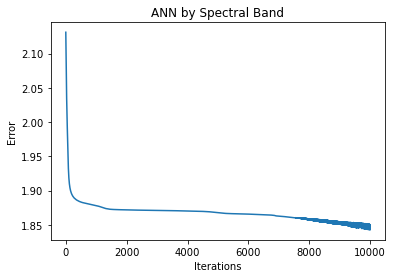

Model Accuracy: 0.229


In [16]:
#Number of Epochs
NUM_EPOCHS = 10000

#Create the Session
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

#Convert the Y Values to a Probability Version
def to_probability_category(data, num_categories):
    output = []
    for data_entry in data:
        new_row = [0] * num_categories
        new_row[data_entry] = 1
        output.append(new_row)
    return output

y_probs = to_probability_category(classification_values,8)


#Will Log the Errors
errors = []

#Training
for currEpoch in range(NUM_EPOCHS):
    temp, error = sess.run([optimiser, cost], feed_dict={
        y_: y_probs,
        s1_: spectral_values_by_band_grouped[0],
        s2_: spectral_values_by_band_grouped[1],
        s3_: spectral_values_by_band_grouped[2],
        s4_: spectral_values_by_band_grouped[3],
    })
    errors.append(error)
    #Percentage Counter
    if (currEpoch % 100 == 0):
        print(currEpoch / NUM_EPOCHS * 100, "%")

correct_classifications = sess.run(layers[-1]["activation"], feed_dict={
    y_: y_probs,
    s1_: spectral_values_by_band_grouped[0],
    s2_: spectral_values_by_band_grouped[1],
    s3_: spectral_values_by_band_grouped[2],
    s4_: spectral_values_by_band_grouped[3]
})  

#Show the Error Graph
plt.plot(errors)
plt.title("ANN by Spectral Band")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()


#Setup Test Data
_1, testOutput, _2, _3, testBandGroups  = load_file(DATASET_TESTING)
y_test_probs= to_probability_category(testOutput,8)
test_dict = { 
    y_: y_test_probs,
    s1_: testBandGroups[0],
    s2_: testBandGroups[1],
    s3_: testBandGroups[2],
    s4_: testBandGroups[3]
}

#Testing Data
correct_prediction = tf.equal(tf.argmax(layers[-1]["activation"], 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Model Accuracy:',accuracy.eval(feed_dict=test_dict))



sess.close()
